**Getting Started**

In [18]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Pretty display
%matplotlib inline


In [2]:
# Change working directory

import os
os.chdir('F:/Data_Analytics/Udacity_ML_Engr')


In [37]:
# Define helper function filter_data()

def filter_data(data,condition): 
    """
    Remove elements that do not match the conditions provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
        '<field> <operator> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=
    
    Example: ["Sex == 'male'", "Age < 18"]
    """

    field, operator, value = condition.split(" ")
    
    
    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")
        
        
    # get booleans for filtering
    if operator == ">":
        matches = data[field] > value
    
    elif operator == "<":
        matches = data[field] < value
    
    elif operator == ">=":
        matches = data[field] >= value
    
    elif operator == "<=":
        matches = data[field] <= value
    
    elif operator == "==":
        matches = data[field] == value
    
    elif operator == "!=":
        matches = data[field] != value
        
    else:  # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != are allowed.")
    
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data


In [38]:
# Define helper function survival_stats()

def survival_stats(data, outcomes, key, filters = []):
    """
    Print out selected statistics regarding survival, given a feature of
    interest and any number of filters (including no filters)
    """
    
    # Check that the key exists
    if key not in data.columns.values:
        print("{} is not a feature of the Titanic dataset. Please check your spellings.".format(key))
        return False
    
    # Return the function before visualizing if 'Cabin' or 'Ticket' is selected:
    # too many unique categories to display
    
    if(key == 'Cabin' or key == 'PassengerId' or key == 'Ticket'):
        print("'{}' has too many unique categories to display! Try a different feature.".format(key))
        return False
    
    # Merge data and outcomes into single dataframe
    df_all = pd.concat([data, outcomes.to_frame()], axis=1)
    
    # Apply filters to data
    for condition in filters:
        df_all = filter_data(df_all, condition)
        
    # Create outcomes DataFrame:
    df_all = df_all[[key, 'Survived']]
    
    # Create plotting figure
    plt.figure(figsize=(8,6))
    
    # Numerical features
    if(key == 'Age' or key == 'Fare'):
        
        # Remove NaN values from Age data
        df_all = df_all[~np.isnan(df_all[key])]
        
        # Divide the range of data into bins and count survival rates
        min_value = df_all[key].min()
        max_value = df_all[key].max()
        value_range = max_value - min_value
        
        # 'Fares' has larger range of values than 'Age' so create more bins
        if(key == 'Fare'):
            bins = np.arange(0, df_all['Fare'].max() + 20, 20)
        if(key == 'Age'):
            bins = np.arange(0, df_all['Age'].max() + 10, 10)
            
        # Overlay each bin's survival rates
        nonsurv_vals = df_all[df_all['Survived']==0][key].reset_index(drop=True)
        surv_vals = df_all[df_all['Survived']==1][key].reset_index(drop=True)
        plt.hist(nonsurv_vals, bins = bins, alpha = 0.6, color = 'red', label = 'Did not survive')
        plt.hist(surv_vals, bins = bins, alpha = 0.6, color = 'green', label = 'Survived')
        
        # Add legend to plot
        plt.xlim(0, bins.max())
        plt.legend(framealpha = 0.8)
        
    # Categorical features
    else:
        
        # Set the various categories
        if(key == 'Pclass'):
            values = np.arange(1,4)
        if(key == 'Parch' or key == 'SibSp'):
            values = np.arange(0, np.max(data[key]) + 1)
        if(key == 'Embarked'):
            values = ['C', 'Q', 'S']
        if(key == 'Sex'):
            values = ['male', 'female']
            
        # Create DataFrame containing categories and count of each
        frame = pd.DataFrame(index = np.arange(len(values)), columns=(key, 'Survived', 'NSurvived'))
        for i, value in enumerate(values):
            frame.loc[i] = [value, 
                           len(df_all[(df_all['Survived']==1) & (df_all[key]==value)]),
                           len(df_all[(df_all['Survived']==0) & (df_all[key]==value)])]
                               
        # Set the width of each bar
        bar_width = 0.4
        
        # Display each category's survival rates
        for i in np.arange(len(frame)):
            nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['NSurvived'], width=bar_width, color='r')
            surv_bar = plt.bar(i, frame.loc[i]['Survived'], width=bar_width, color='g')
            
            plt.xticks(np.arange(len(frame)),values)
            plt.legend((nonsurv_bar[0], surv_bar[0]), ('Did not survive', 'Survived'), framealpha=0.8)
            
    # Common attributes for plot formatting
    plt.xlabel(key)
    plt.ylabel('Number of Passengers')
    plt.title('Passenger Survival Statistics with \'%s\' Feature'%(key))
    plt.show()
    
    # Report number of passengers with missing values
    if sum(pd.isnull(df_all[key])):
        nan_outcomes = df_all[pd.isnull(df_all[key])]['Survived']
        print("Passengers with missing '{}' values: {} ({} survived, {} did not survive)".format(key,
                                                                                                len(nan_outcomes),
                                                                                                sum(nan_outcomes==1),
                                                                                                sum(nam_outcomes==0)))
        

** Load the Dataset **

In [3]:
# Load the dataset

in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Take a look at the head of dataset
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Retrieve the response variable into a series

outcomes = full_data['Survived']
data = full_data.drop('Survived', axis=1)  # drop from the column direction

data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Define the metric to score model performance
# Here we use Accuracy score

def accuracy_score(real, pred):
    """ Returns accuracy score for comparing reality and predicted """
    
    # Ensure that the number of predictions matches the number of outcomes
    if len(real) == len(pred):
    
        # Calculate and return the accuracy as a percentage
        return "Predictions have an accuracy of {:.2f}%".format((real == pred).mean()*100)
    
    else:
        
        # Error message
        return "Error: Number of predictions does not match the number of outcomes."
    

In [8]:
# Test the function

predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%


** Make Predictions **

In [13]:
def predict_0(data):
    """ Model with no features. Always predict a passenger did not survive. """
    
    predictions = []  # instantiate a list to store the prediction results
    
    for _, passenger in data.iterrows():
        
        # Predict the survival of passenger
        predictions.append(0)  # Assign 0 for "did not survive"
        
    # Return the predictions
    return pd.Series(predictions)


In [14]:
# Make the predictions
predictions_0 = predict_0(data)

** Question 1 **  
Using the RMS Titanic data, how accurate would a prediction be that non of the passengers survived?

In [17]:
print(accuracy_score(outcomes, predictions_0))

Predictions have an accuracy of 61.62%


** Explore gender difference between survivors **

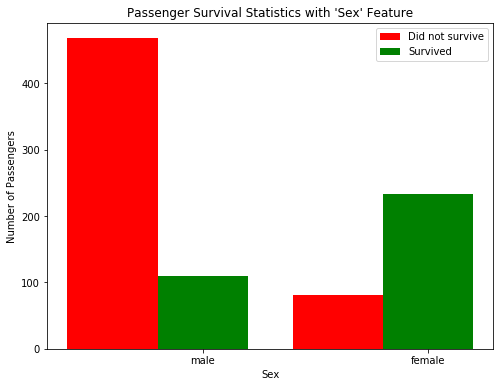

In [23]:
# take a look at impact of feature "Sex"

survival_stats(data, outcomes, 'Sex')

In [33]:
# If a passenger was female then predict to be survived, otherwise predict to be did not survive

def predict_1(data):
    """ 
    Model with one feature 
    Predict the passenger survived if they are female
    """
    
    predictions = []
    for _, passenger in data.iterrows():
    
        if passenger['Sex']=='female':
            predictions.append(1)
            
        else:
            predictions.append(0)
        
    return pd.Series(predictions)
       

In [34]:
# Make the predictions
predictions_1 = predict_1(data)

** Question 2 **  
How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

In [35]:
print(accuracy_score(outcomes, predictions_1))

Predictions have an accuracy of 78.68%


** Explore age gap between survivors **

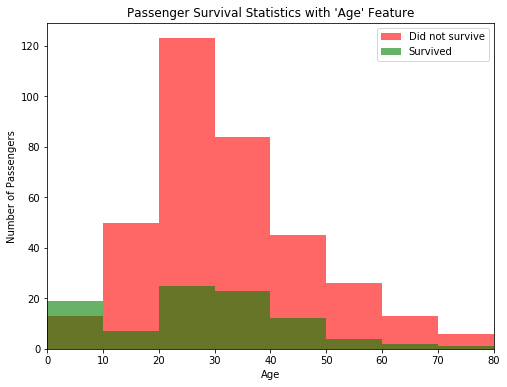

In [39]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [48]:
def predict_2(data):
    """
    Model with 2 features:
    Predict a passenger survived  if they are female
    Predict a passenger survived if they are male and younger than 10
    """
    
    predictions = []
    
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
            
        elif passenger['Age'] < 10:
            predictions.append(1)
            
        else:
            predictions.append(0)
            
    return pd.Series(predictions)

In [49]:
# Make the predictions
predictions_2 = predict_2(data)

** Question 3 **  
How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?

In [50]:
print(accuracy_score(outcomes, predictions_2))

Predictions have an accuracy of 79.35%


** Explore other features **  

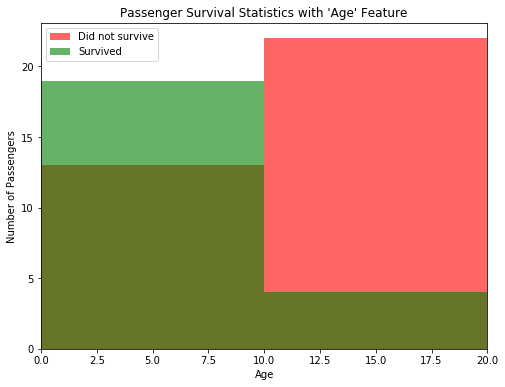

In [51]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male", "Age < 18"])

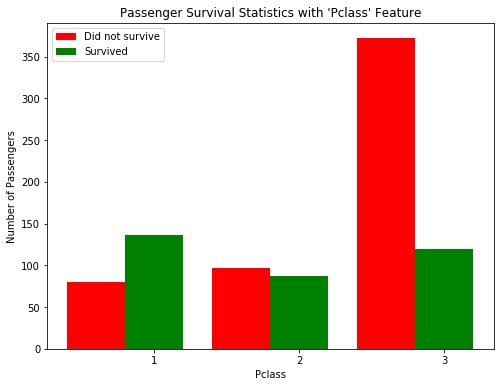

In [52]:
survival_stats(data, outcomes, 'Pclass')

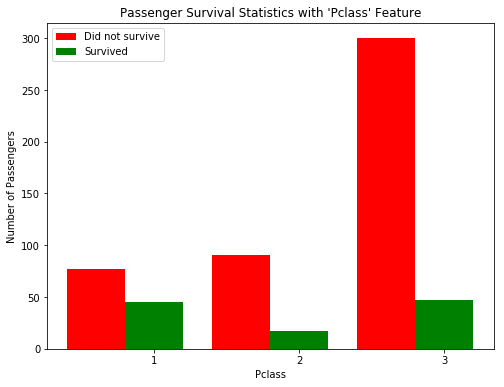

In [62]:
survival_stats(data, outcomes, 'Pclass', ["Sex == 'male'"])

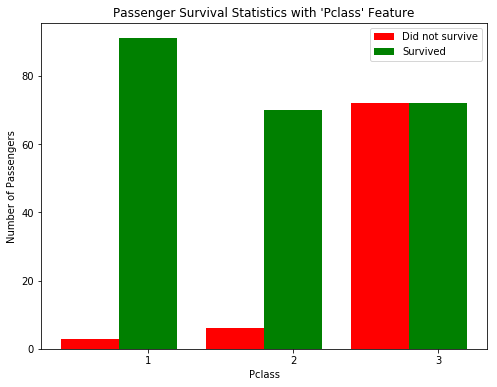

In [63]:
survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'"])

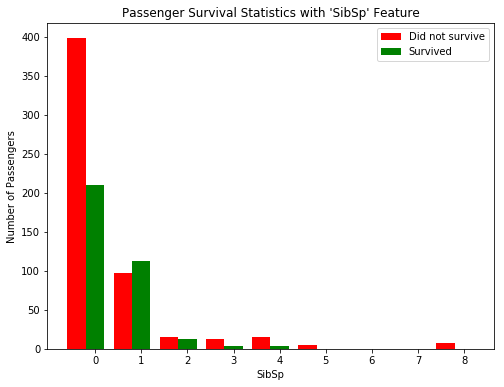

In [56]:
survival_stats(data, outcomes, 'SibSp')

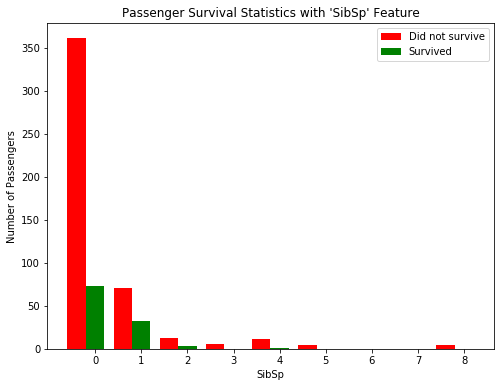

In [57]:
survival_stats(data, outcomes, 'SibSp', ["Sex == 'male'"])

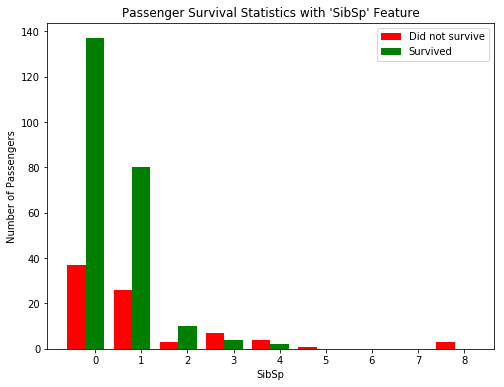

In [58]:
survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"])

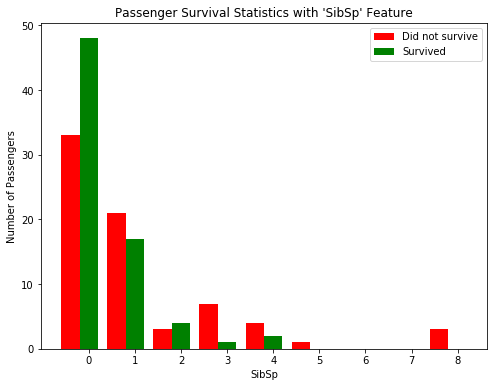

In [64]:
survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'", "Pclass == 3"])

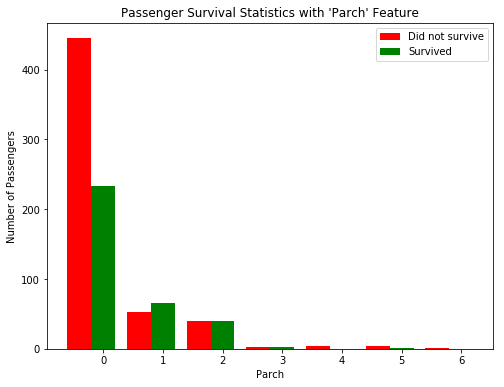

In [59]:
survival_stats(data, outcomes, 'Parch')

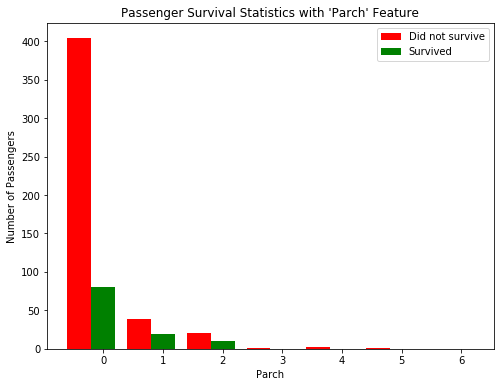

In [60]:
survival_stats(data, outcomes, 'Parch', ["Sex == 'male'"])

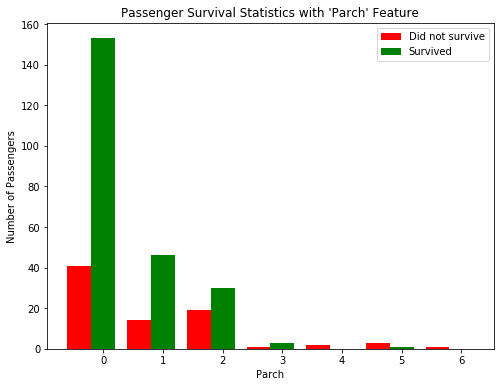

In [61]:
survival_stats(data, outcomes, 'Parch', ["Sex == 'female'"])

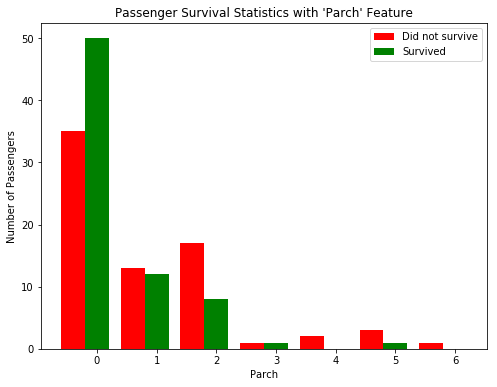

In [65]:
survival_stats(data, outcomes, 'Parch', ["Sex == 'female'", "Pclass == 3"])

In [73]:
def predict_3(data):
    """
    Model with 2 features:
    Predict a passenger survived  if they are female
    Predict a passenger survived if they are male and younger than 10
    """
    
    predictions = []
    
    for _, passenger in data.iterrows():
                     
        if passenger['Sex'] == 'female':
            if passenger['Pclass'] != 3:
                predictions.append(1)
            else:
                if (passenger['SibSp'] == 0) & (passenger['Parch'] == 0): 
                    predictions.append(1)
                else:
                    predictions.append(0)
            
        elif passenger['Age'] < 10:
            predictions.append(1)
            
        else:
            predictions.append(0)
            
    return pd.Series(predictions)

In [74]:
# Make the predictions
predictions_3 = predict_3(data)

** Question 4 **  
How accurate would a prediction be if we predict:  

- females
- from upper or middle social class
- lower class with no parents or siblings on board
- children under 10  

to be survivors

In [75]:
print(accuracy_score(outcomes, predictions_3))

Predictions have an accuracy of 80.92%


** Question 5 **

A real-world scenario where supervised learning could be applied:
Predicting whether the customer purchase milk power in the supermarket  

Two features that might be helpful:
1. Gender  
Females are more likely to take care of the babies and buy milk power
2. Age  
20-30 year old parents are more likely to have small babies that needs milk power